In [3]:
#importing all relevant packages
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from cycler import cycler
import seaborn as sns

In [4]:
#importing relevant data from three different sites
windDailyData = {}
solarDailyData = {}

windMonthlyData = {}
solarMonthlyData = {}

windSpeedHourlyData = {}
windSpeedDailyData = {}

solarHourlyIrradianceData = {}
solarDailyIrradianceData = {}

sites = ["centralWestSite","northEastSite","northWestSite"]
labelSites = ["Central West", "North East", "North West"]

for site in sites:
    df = pd.read_excel(f"../productionHydrogenOptModel/dataInputs/sites/{site}/reData.xlsx")

    #now getting monthly data
    dailyAverageCfs = df.groupby(pd.Grouper(freq='D', key='Time')).mean()
    
    dailySolarDHI = df.groupby(pd.Grouper(freq='D', key='Time')).mean()
    
    
    #raw hourly wind and solar data
    windDailyData[site] = df["cfWind"]
    solarDailyData[site] = df["cfWind"]
    
    #raw hourly wind speed data
    windSpeedHourlyData[site] = df["wind_speed"]
    
    #wind speed daily data
    windSpeedDailyData[site] = dailyAverageCfs["wind_speed"]

    #raw hourly solar irradiance
    solarHourlyIrradianceData[site] = df["irradiance_direct"]
    
    #raw daily solar irradiance
    solarDailyIrradianceData[site] = dailySolarDHI["irradiance_direct"]

    
    #now getting monthly data
    monthlyAverageCfs = df.groupby(pd.Grouper(freq='M', key='Time')).mean()

    
    windMonthlyData[site] = monthlyAverageCfs["cfWind"]
    solarMonthlyData[site] = monthlyAverageCfs["cfSolar"]
     

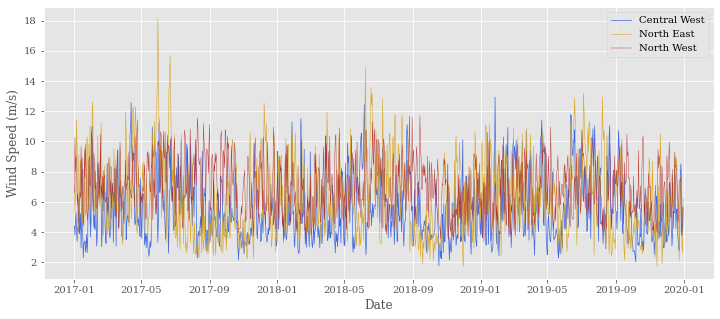

In [5]:
#now plotting the three sites for wind speed
matplotlib.style.use('ggplot')
plt.rcParams["font.family"] = "serif"
#changing color map
name = "Accent"
cmap = plt.get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list
plt.rc('axes', prop_cycle=(cycler('color', ['royalblue', 'goldenrod', 'firebrick'])))

#creating right size plot
plt.figure(1, figsize=(12, 5)) # Figure size in inches (size_x, size_y)

#plt.title("Average Monthly Wind Capacity Factors")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")

sites = ["centralWestSite","northEastSite","northWestSite"]

transparency = .7
for labelSite,site in zip(labelSites,sites):
    plt.plot(windSpeedDailyData[site],label = labelSite,lw=transparency)
    transparency -= .15
    
plt.legend()


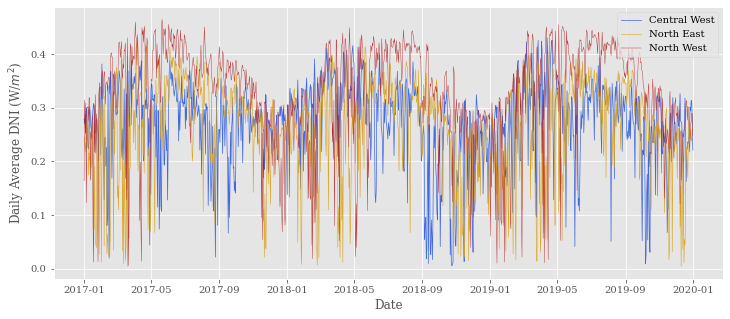

In [7]:
#now plotting the three sites for wind speed
matplotlib.style.use('ggplot')
plt.rcParams["font.family"] = "serif"
#changing color map
name = "Accent"
cmap = plt.get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list
plt.rc('axes', prop_cycle=(cycler('color', ['royalblue', 'goldenrod', 'firebrick'])))

#creating right size plot
plt.figure(1, figsize=(12, 5)) # Figure size in inches (size_x, size_y)

#plt.title("Average Monthly Wind Capacity Factors")
plt.xlabel("Date")
plt.ylabel("Daily Average DNI (W/$m^{2}$)")

sites = ["centralWestSite","northEastSite","northWestSite"]

transparency = .7
for labelSite,site in zip(labelSites,sites):
    plt.plot(solarDailyIrradianceData[site],label = labelSite,lw=transparency)
    transparency -= .15
    
plt.legend()

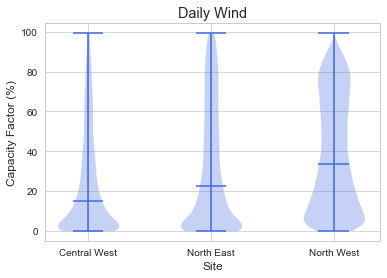

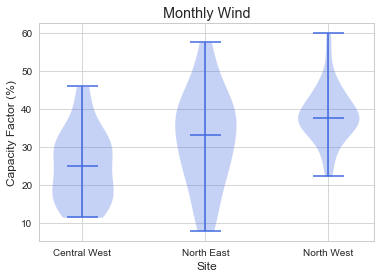

In [4]:
#now plotting violin plots
sns.set_style("whitegrid")
data_to_plot1 = []
data_to_plot2 = []

for site in sites:
    data_to_plot1.append(windDailyData[site]*100)
    data_to_plot2.append(windMonthlyData[site]*100)

# Create the violin plot for daily1
plt.violinplot(data_to_plot1,showmedians=True)


labels = labelSites.copy()
labels.insert(0,"")

plt.xticks(range(len(labels)), labels, size='medium')
plt.xlabel("Site")
plt.title("Daily Wind")
plt.xlim(left=.65) 
plt.ylabel("Capacity Factor (%)")
plt.show()

# Create the violin plot for 2
plt.violinplot(data_to_plot2,showmedians=True)

labels = labelSites.copy()
labels.insert(0,"")

plt.xticks(range(len(labels)), labels, size='medium')
plt.xlabel("Site")
plt.title("Monthly Wind")
plt.xlim(left=.65) 
plt.ylabel("Capacity Factor (%)")
plt.show()


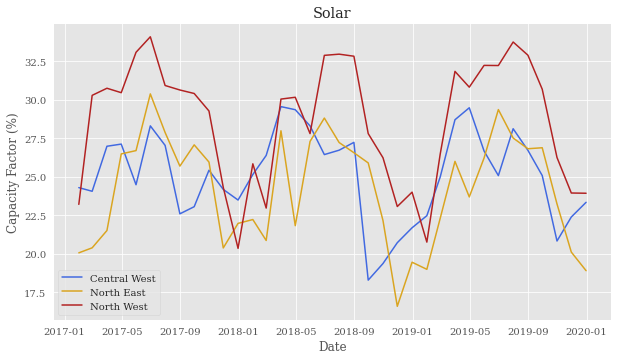

In [5]:
#now plotting the three lines first for wind
matplotlib.style.use('ggplot')
plt.rcParams["font.family"] = "serif"
#changing color map
name = "Accent"
cmap = plt.get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list
plt.rc('axes', prop_cycle=(cycler('color', ['royalblue', 'goldenrod', 'firebrick'])))

#creating right size plot
plt.figure(1, figsize=(10, 12)) # Figure size in inches (size_x, size_y)
plt.subplot(211)
#plt.title("Average Monthly Wind Capacity Factors")
plt.xlabel("Date")
plt.ylabel("Capacity Factor (%)")
plt.title("Solar")

for labelSite,site in zip(labelSites,sites):
    plt.plot(solarMonthlyData[site]*100,label = labelSite)
    
plt.legend()

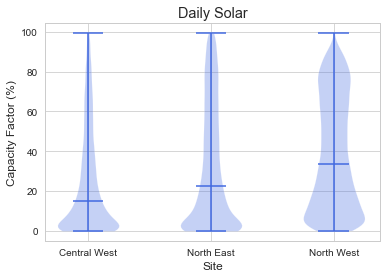

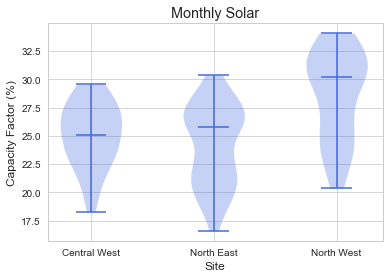

In [6]:
#now plotting violin plots
sns.set_style("whitegrid")
data_to_plot1 = []
data_to_plot2 = []

for site in sites:
    data_to_plot1.append(solarDailyData[site]*100)
    data_to_plot2.append(solarMonthlyData[site]*100)

# Create the violin plot for daily1
plt.violinplot(data_to_plot1,showmedians=True)


labels = labelSites.copy()
labels.insert(0,"")

plt.xticks(range(len(labels)), labels, size='medium')
plt.xlabel("Site")
plt.title("Daily Solar")
plt.xlim(left=.65) 
plt.ylabel("Capacity Factor (%)")
plt.show()

# Create the violin plot for 2
plt.violinplot(data_to_plot2,showmedians=True)

labels = labelSites.copy()
labels.insert(0,"")

plt.xticks(range(len(labels)), labels, size='medium')
plt.xlabel("Site")
plt.title("Monthly Solar")
plt.xlim(left=.65) 
plt.ylabel("Capacity Factor (%)")
plt.show()
